In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('co2.csv', parse_dates=['date'], index_col='date')

In [2]:
data.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [14]:
#TSdata = sm.datasets.co2.load_pandas()
#TSco2Test = TSdata.data

#y = TSco2Test['co2'].resample('MS').mean()
y = data['co2'].resample('MS').mean()
y.isnull().sum()
y.info()

AttributeError: 'Series' object has no attribute 'info'

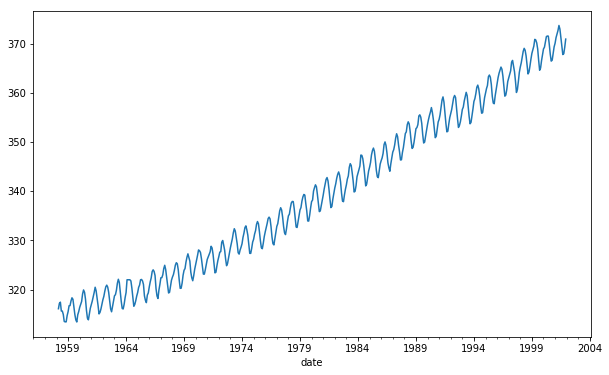

In [4]:
y = y.fillna(y.bfill())
y.plot(figsize=(10, 6))
plt.show()

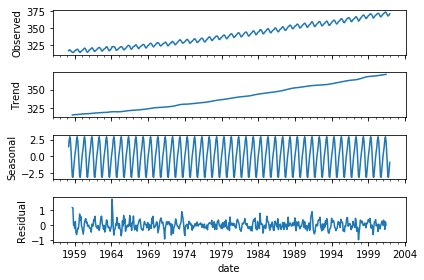

In [5]:
deco = sm.tsa.seasonal_decompose(y, model='additive')
fig = deco.plot()
plt.show()

In [6]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
				)

TSresults = mod.fit()

#print(TSresults.summary().tables[1])

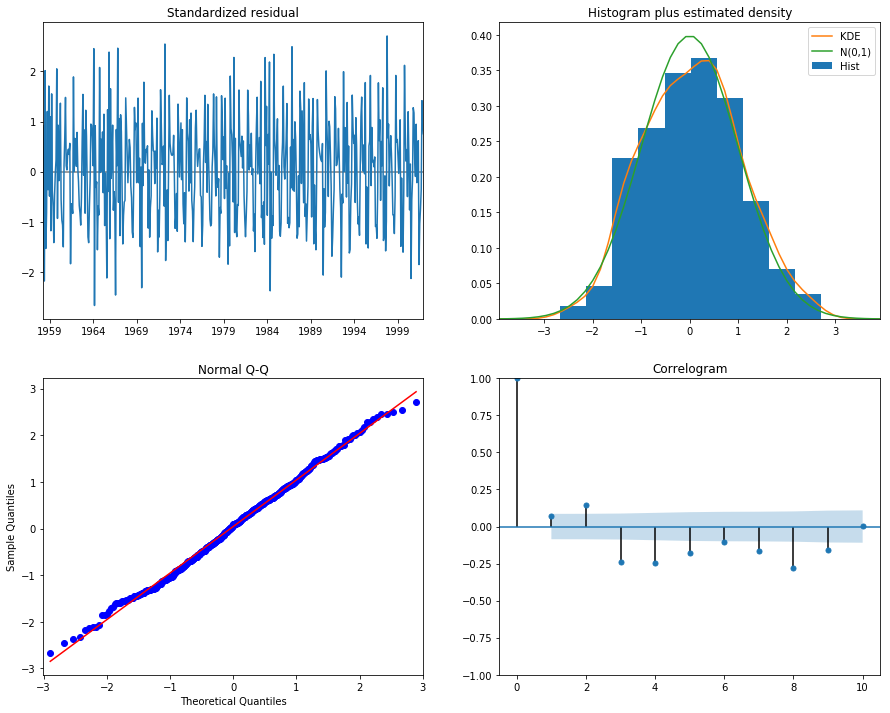

In [8]:
TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

In [9]:
pred = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower co2,upper co2
date,,
1998-01-01,363.993241,367.143395
1998-02-01,364.302464,367.452618
1998-03-01,365.221551,368.371705
1998-04-01,366.662384,369.812537
1998-05-01,367.698431,370.848585


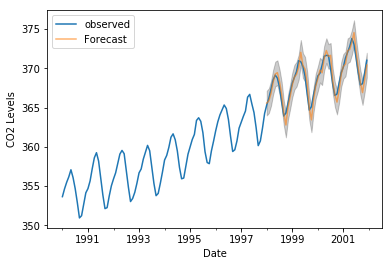

In [10]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [11]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Mean Squared Error of our forecasts is 0.57


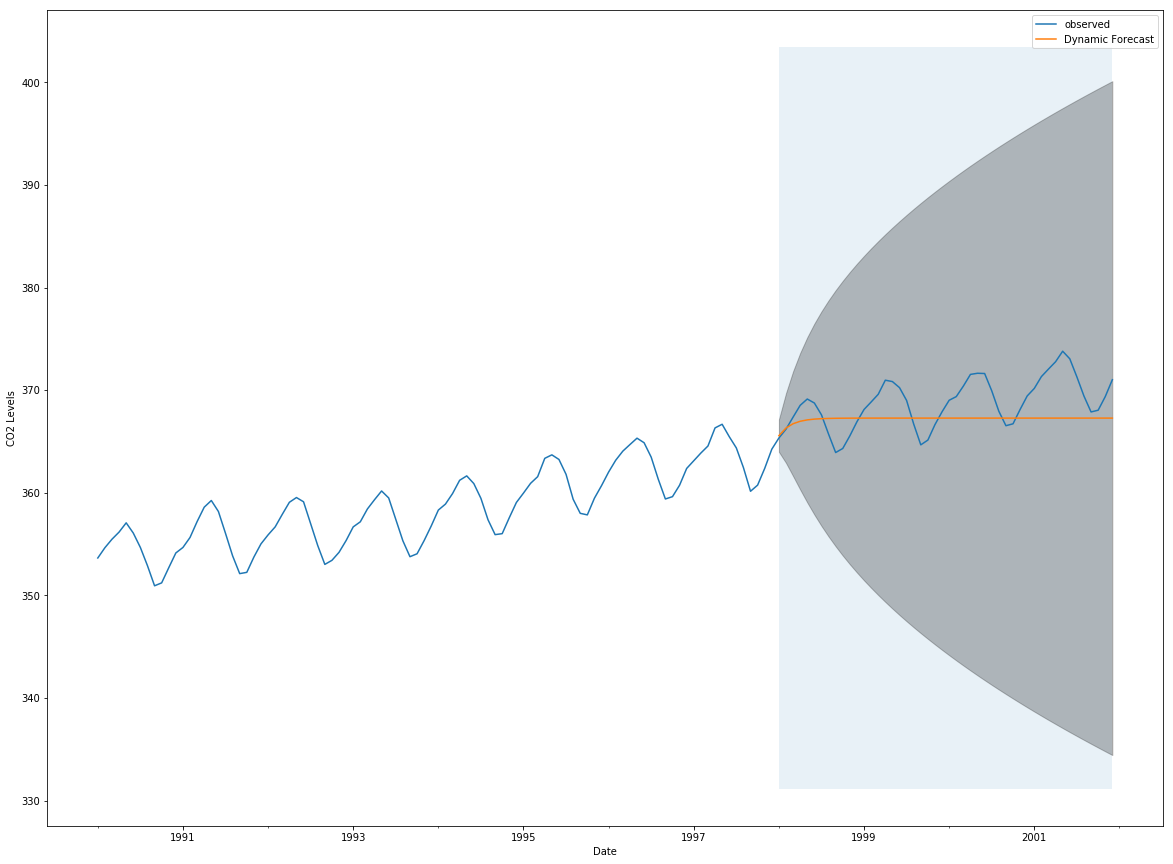

In [12]:
pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

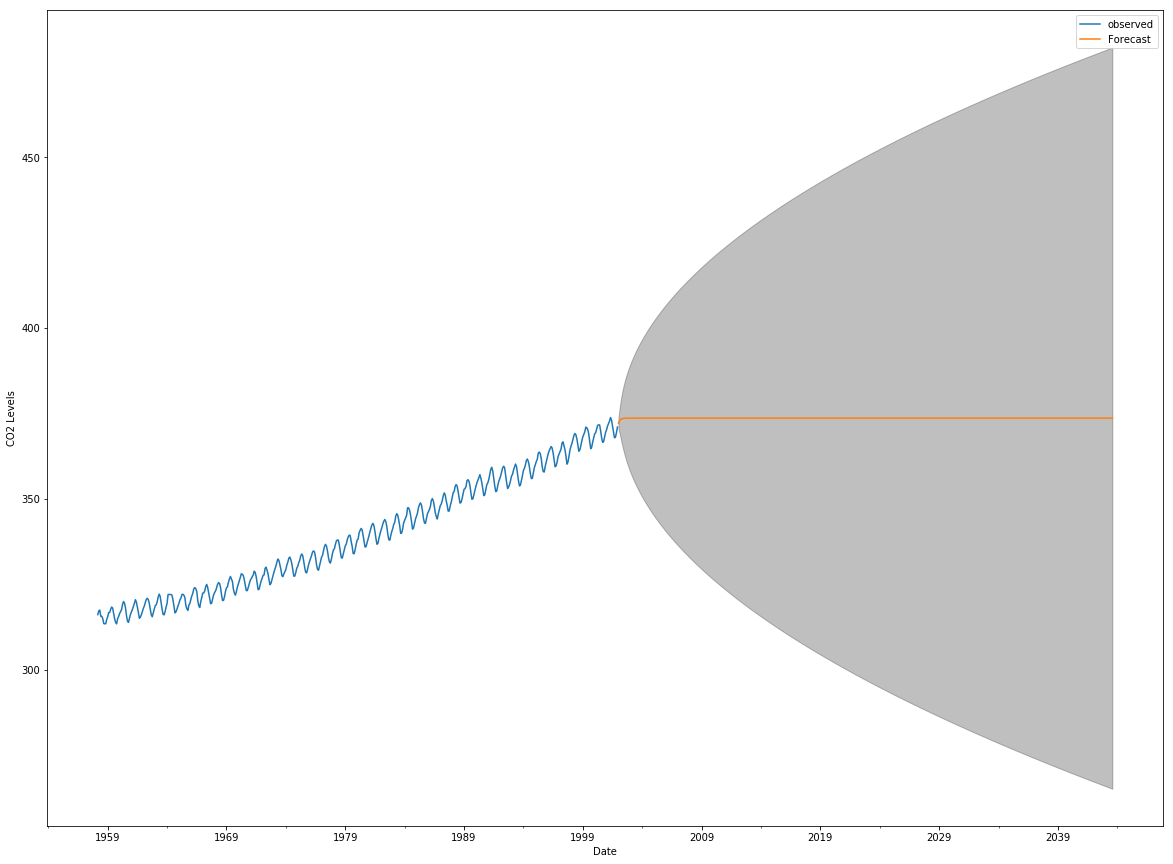

In [13]:
# Get forecast 500 steps ahead in future
pred_uc = TSresults.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()